In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('cwurData.csv')

In [14]:
# Kiểm tra giá trị NaN
df.isna().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [15]:
# Kiểm tra các giá trị trùng lặp
df.duplicated().sum()

0

In [16]:
# In ra cột chứa giá trị trùng lặp
df[df.duplicated()]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


In [17]:
# Loại bỏ các dòng chứa giá trị trùng lặp
df = df.drop_duplicates()

In [18]:
# Kiểm tra lại
df.duplicated().sum()

0

In [19]:
# Loại bỏ giá trị NaN
df = df.dropna()

In [20]:
# Kiểm tra lại
df.isna().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [23]:
data = pd.read_csv("cwurData.csv")
data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

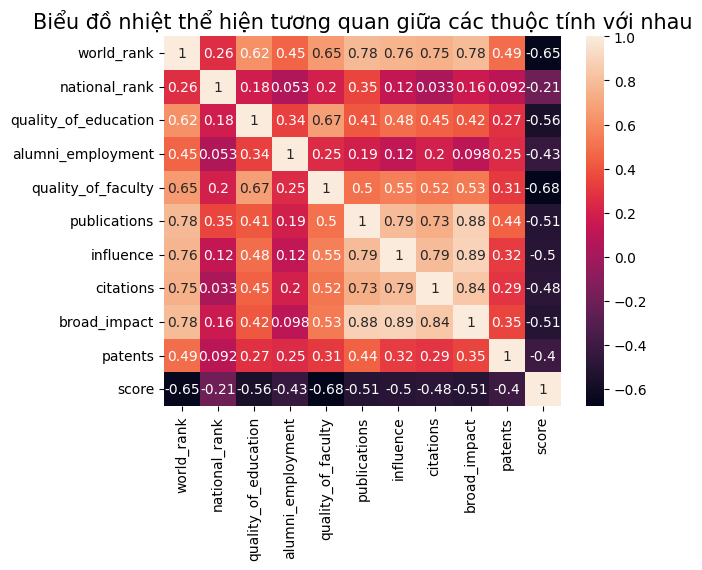

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp Excel (thay đổi tên tệp và tên cột theo dữ liệu của bạn)
data = pd.read_csv('cwurData.csv')
# Loại bỏ cột 'Năm'
data.drop(['year','institution','country'], axis=1, inplace=True)
# Tạo biểu đồ nhiệt
sns.heatmap(data=data.corr(), annot=True)
plt.title('Biểu đồ nhiệt thể hiện tương quan giữa các thuộc tính với nhau', fontsize="15")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hoá dữ liệu

scale = StandardScaler()

X = data[['world_rank','broad_impact']]

scaledX = scale.fit_transform(X)

# Tạo DataFrame mới từ dữ liệu scaled
scaled_df = pd.DataFrame(scaledX, columns=X.columns)

# Ghép cả dữ liệu gốc và dữ liệu đã scaled
data = pd.concat([data.drop(columns=X.columns), scaled_df], axis=1)

# Loại bỏ các cột không cần thiết cho phân cụm
data.drop(['national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents',
       'score'], inplace=True, axis=1)

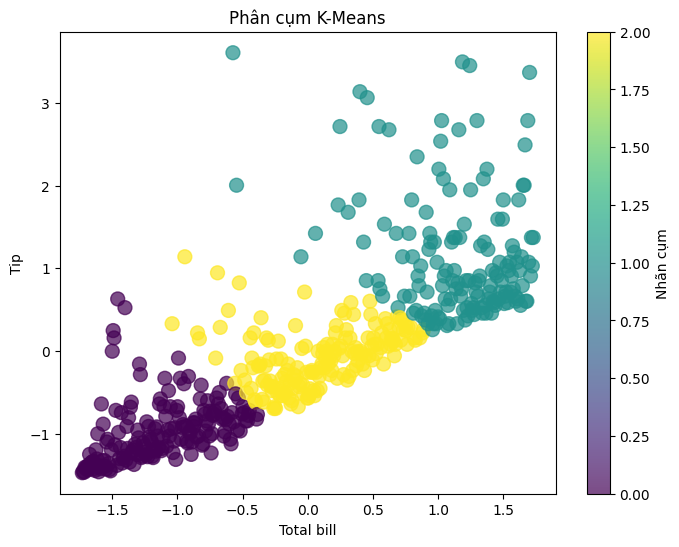

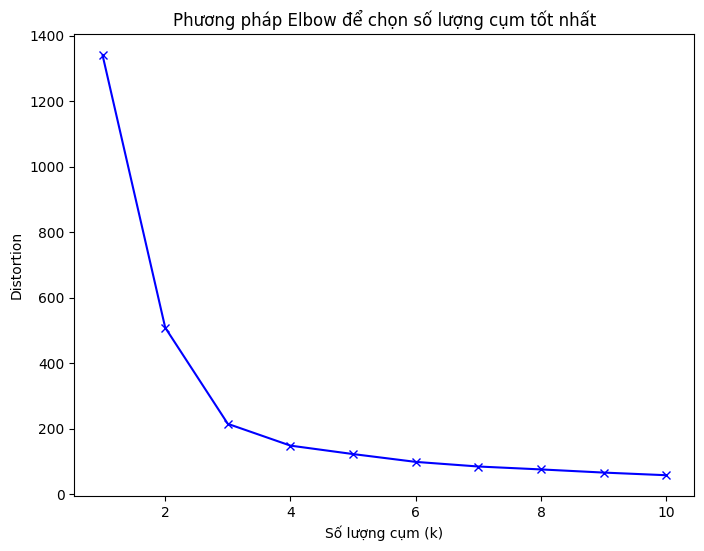

In [29]:
from sklearn.cluster import KMeans

data1 = data.copy()

df1 = pd.DataFrame(data1)

# Áp dụng thuật toán K-means với số cụm là
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

# Thêm cột 'Nhãn cụm' vào DataFrame
df1['Nhãn cụm'] = kmeans.labels_




# Trực quan hóa biểu đồ scatter plot với phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(df1['world_rank'], df1['broad_impact'],
            c=df1['Nhãn cụm'], cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Phân cụm K-Means')
plt.colorbar(label='Nhãn cụm')
plt.show()


# Tính distortion cho các giá trị k từ 1 đến 10
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)
# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Distortion')
plt.title('Phương pháp Elbow để chọn số lượng cụm tốt nhất')
plt.show()

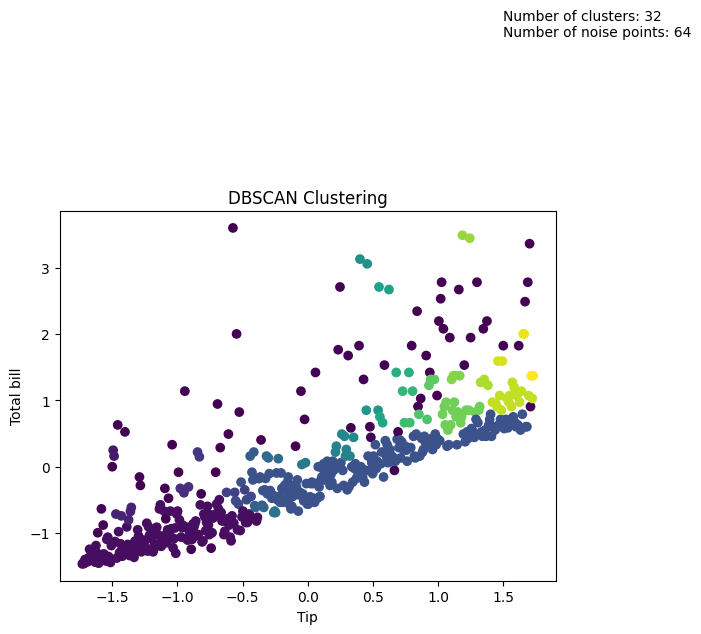

In [30]:
from sklearn.cluster import DBSCAN

data2 = np.array(data.copy())

# Áp dụng thuật toán DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)

clusters = dbscan.fit_predict(data2)

# Hiển thị kết quả và thông tin
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters) - 1  # Trừ đi cụm noise
num_noise_points = np.sum(clusters == -1)

plt.scatter(data2[:, 0], data2[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Tip')
plt.ylabel('Total bill')
plt.text(1.5, 6.5, f"Number of clusters: {num_clusters}\nNumber of noise points: {num_noise_points}")
plt.show()


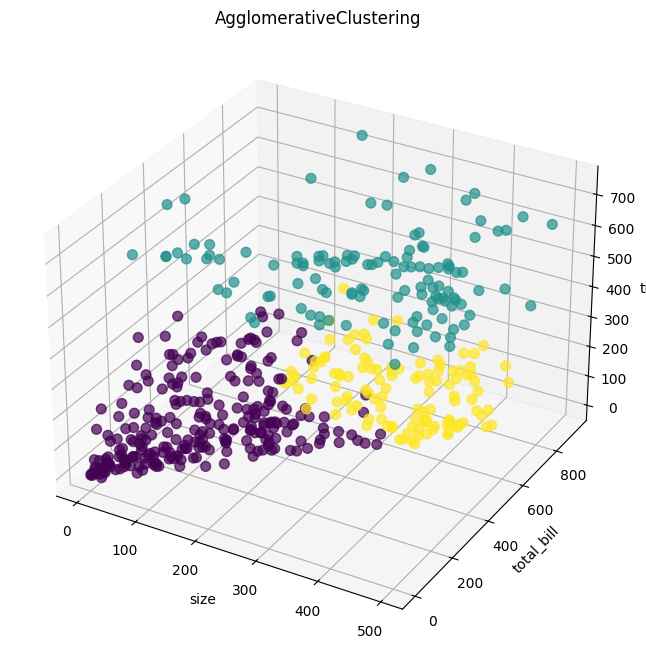

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Read the data
data5 = pd.read_csv('cwurData.csv')

# Select relevant columns
features = data5[['world_rank','broad_impact','patents']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
labels = agg_clustering.fit_predict(features_standardized)

# Visualize the data and classified clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points
ax.scatter(features.iloc[:, 0], features.iloc[:, 1], features.iloc[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)

# Set labels
ax.set_xlabel('size')
ax.set_ylabel('total_bill')
ax.set_zlabel('tip')
ax.set_title('AgglomerativeClustering')

plt.show()